# Referenced Notebooks

I participated in a tabular data competition for the first time and learned a lot from the notebooks below. They quickly helped me understand the data characteristics of the competition. These are all great notebooks. If you have time, I recommend reading them (don't forget to help the authors upvote).

* [🚑Simple EDA and XGB baseline you can read in 3min](https://www.kaggle.com/code/kimtaehun/simple-eda-and-xgb-baseline-you-can-read-in-3min)

* [ICR | Simple EDA & Baseline](https://www.kaggle.com/code/datafan07/icr-simple-eda-baseline)

* [[ICR IARC, 2023] EDA and Submission](https://www.kaggle.com/code/sergiosaharovskiy/icr-iarc-2023-eda-and-submission/notebook)

# Introduction 

This is a great dataset for learning Machine Learning. It is a tabular dataset with only around 6000 rows in the training set, which makes it very beginner-friendly. This is also my first time working with a tabular dataset. I am excited to participate in this competition and learn more about tabular dataset analysis, processing, and modeling. I plan to use a generic ML project pipeline and share my notebook. If there is any way I can improve, please feel free to provide feedback and comments.

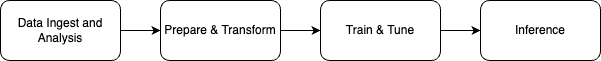

The **pipelines** in this notebook will be 4 parts:

1. Data Ingest & Analysis (In Kaggle, we only do EDA since the data is provided)
In data analysis part, we will first get to know the dataset and target we are going to predict.
Below are the purpost of data analysis:

    * Step 1: EDA 
    
       Overview of the dataset: Examining basic information about the dataset, such as dimensions, data types, and missing values.

    * Step 1: Problem Defination

      Determind what class of problem: A regression Problem? A Classification Problem?

    * Step 2: Algorithm Selection

      Algorithms --> Hyper-Parameters -> Different format of the data taht expects on the input for Training

    * Step 3: Dataset Schema Detection

      Dataset Schema --> Transformate the Data -> Selected Algorithms(Models) can accept the data on input for training
  
2. Prepare & Transform 

    * Class Imbalance

    * Data Preparation: Train and Validation Data Splits
    
    * Data cleaning: Addressing issues such as missing values, duplicates, and outliers.

3. Train & Tune
4. Deploy & Manage (Inference)

# Data Ingest & Analysis( EDA only in Kaggle)

**Load libraries**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

import time
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns

**Load data**

In [3]:
train_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
test_df  = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
greeks_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/greeks.csv')
sample_submission = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv')

In [4]:
train_df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [5]:
train_df.shape

(617, 58)

In [6]:
test_df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
test_df.shape

(5, 57)

In [8]:
greeks_df.head()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020


In [9]:
greeks_df.shape

(617, 6)

In [10]:
len(greeks_df.Id.unique())

617

In [11]:
len(train_df.Id.unique())

617

In [12]:
set(greeks_df.Id.unique()) == set(train_df.Id.unique())

True

Question: 

`train` and `greeks` has the same unique `Id`
however, the the 'col' in test is not exist in `test`
How to deal with `greeks`?

In [13]:
greeks_df['Alpha'].unique()

array(['B', 'A', 'D', 'G'], dtype=object)

In [14]:
greeks_df['Beta'].unique()

array(['C', 'B', 'A'], dtype=object)

In [15]:
greeks_df['Gamma'].unique()

array(['G', 'M', 'F', 'N', 'E', 'H', 'A', 'B'], dtype=object)

In [16]:
greeks_df['Delta'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [17]:
len(greeks_df['Epsilon'].unique())

198

In [18]:
greeks_df.isnull().sum().loc[greeks_df.isnull().sum() > 0]

Series([], dtype: int64)

In [19]:
len(greeks_df[greeks_df['Epsilon'] == "Unknown"])

144

in `greeks`'s `Epsilon` column, there is 144 miss rows out of totally 617

which means 23.3% are missing data in `Epsilon`

In [20]:
train_df.dtypes

Id        object
AB       float64
AF       float64
AH       float64
AM       float64
AR       float64
AX       float64
AY       float64
AZ       float64
BC       float64
BD       float64
BN       float64
BP       float64
BQ       float64
BR       float64
BZ       float64
CB       float64
CC       float64
CD       float64
CF       float64
CH       float64
CL       float64
CR       float64
CS       float64
CU       float64
CW       float64
DA       float64
DE       float64
DF       float64
DH       float64
DI       float64
DL       float64
DN       float64
DU       float64
DV       float64
DY       float64
EB       float64
EE       float64
EG       float64
EH       float64
EJ        object
EL       float64
EP       float64
EU       float64
FC       float64
FD       float64
FE       float64
FI       float64
FL       float64
FR       float64
FS       float64
GB       float64
GE       float64
GF       float64
GH       float64
GI       float64
GL       float64
Class      int64
dtype: object

In [21]:
train_df.EJ.unique()

array(['B', 'A'], dtype=object)

All the columns data are `float64` datatype, except `EJ` and `id` is `object` datatype.

The `Class` is `int64`, actuall it is our target to be predicted 

**Conclusions**:

The features could be divided into numerical and categorical features

In [22]:
# select numerical and categorical variables respectively.
num_cols = train_df.select_dtypes(include=['float64']).columns.tolist()
cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Id')

In [23]:
train_df.Class.unique()

array([1, 0])

**Problem Defination**:

The class is only 0, and 1 this is **a binary classification problem**

In [24]:
train_total_row, _ = train_df.shape
test_total_row, _ = test_df.shape
print(f"The training dataset size is: {train_total_row} \nwhile the test dataset is： {test_total_row}")

The training dataset size is: 617 
while the test dataset is： 5


In [25]:
num = len(train_df[train_df['Class'] == 1])
percentage = num / train_total_row * 100
print(f"There are {num} Classes are `1`, which is {percentage:.2f}% total training dataset.")

num = len(train_df[train_df['Class'] == 0])
percentage = num / train_total_row * 100
print(f"There are {num} Classes are `0`, which is {percentage:.2f}% total training dataset.")

There are 108 Classes are `1`, which is 17.50% total training dataset.
There are 509 Classes are `0`, which is 82.50% total training dataset.


**Conclusion**：

This dataset exhibits a significant class imbalance.

In [26]:
train_df.isnull().sum().loc[train_df.isnull().sum() > 0]

BQ    60
CB     2
CC     3
DU     1
EL    60
FC     1
FL     1
FS     2
GL     1
dtype: int64

In [27]:
test_df.isnull().sum().loc[test_df.isnull().sum() > 0]

Series([], dtype: int64)

missing value analysis:

In the training dataset, columns "BQ" and "EL" has almost 10% missing values

"CB, CC, DU, FC, FL, FS" has a very small size of missing value

In [28]:
train_df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


We found:

The term "normalization" can be used to express the process of transforming tabular data where the values in each column have different orders of magnitude, into a standard format where each column is scaled to a common range.

# Modeling

## Preprocessing

In [29]:
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# # Combine numeric and categorical features
# FEATURES = num_cols + cat_cols

# # Fill missing values:  with mean for numeric variables
# imputer = SimpleImputer(strategy='mean')
# numeric_df = pd.DataFrame(imputer.fit_transform(train_df[num_cols]), columns=num_cols)

# # Normalization: Scale numeric variables using min-max scaling
# scaler = MinMaxScaler()
# scaled_numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=num_cols)

# # One-hot encoding: Encode categorical variables using one-hot encoding
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# encoded_cat_df = pd.DataFrame(encoder.fit_transform(train_df[cat_cols]), columns=encoder.get_feature_names_out(cat_cols))

# # Concatenate the scaled numeric and encoded categorical variables
# processed_df = pd.concat([scaled_numeric_df, encoded_cat_df], axis=1)

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from typing import Callable

## Train a Onehot encoder to make it unique between training and inference 
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categories = [['A', 'B'], list(range(2))]
encoder.categories_ = categories
encoder.fit_transform(train_df[cat_cols])

def data_transform(df: pd.DataFrame, num_cols: list, cat_cols: list, encoder: Callable) -> pd.DataFrame:
    
    # Combine numeric and categorical features
    FEATURES = num_cols + cat_cols

    # Fill missing values:  with mean for numeric variables
    imputer = SimpleImputer(strategy='mean')
    numeric_df = pd.DataFrame(imputer.fit_transform(df[num_cols]), columns=num_cols)

    # Normalization: Scale numeric variables using min-max scaling
    scaler = MinMaxScaler()
    scaled_numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=num_cols)

    # One-hot encoding: Encode categorical variables using trained one-hot encoding based on training data
    encoded_cat_df = pd.DataFrame(encoder.transform(df[cat_cols]), columns=encoder.get_feature_names_out(cat_cols))

    # Concatenate the scaled numeric and encoded categorical variables
    return pd.concat([scaled_numeric_df, encoded_cat_df], axis=1)

In [31]:
list(range(2))

[0, 1]

In [34]:
processed_df = data_transform(train_df, num_cols, cat_cols, encoder)

In [35]:
processed_df.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FR,FS,GB,GE,GF,GH,GI,GL,EJ_A,EJ_B
0,0.021082,0.102347,0.00000,0.030632,0.0,0.000000,0.000000,0.180337,0.002958,0.047364,...,0.000998,0.000866,0.054959,0.000000,0.013846,0.176983,0.362261,0.005425,0.0,1.0
1,0.010541,0.027589,0.00000,0.053864,0.0,0.078048,0.000000,0.284500,0.000000,0.074042,...,0.000000,0.016014,0.039418,0.000000,0.194527,0.274495,0.164135,1.000000,1.0,0.0
2,0.063949,0.085715,0.00000,0.046519,0.0,0.160575,0.000000,0.265013,0.000000,0.067011,...,0.000385,0.036139,0.250424,0.011229,0.095035,0.258994,0.180218,0.008910,0.0,1.0
3,0.028110,0.127285,0.01918,0.117854,0.0,0.079462,0.000000,0.215235,0.000000,0.048203,...,0.000000,0.006925,0.109565,0.006882,0.014475,0.425143,0.470820,0.007039,0.0,1.0
4,0.049192,0.124246,0.00000,0.017417,0.0,0.086300,0.002841,0.000000,0.069008,0.078555,...,0.038597,0.001731,0.093459,0.051588,0.059198,0.500829,0.185841,0.004345,0.0,1.0


In [36]:
processed_df.columns

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL', 'FR',
       'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'EJ_A', 'EJ_B'],
      dtype='object')

In [37]:
from sklearn.utils import class_weight

FOLDS = 10
SEED = 1004
xgb_models = []
xgb_oof = []
f_imp = []

counter = 1
X = processed_df
y = train_df['Class']

# Calculate the sample weights
weights = class_weight.compute_sample_weight('balanced', y)

skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=SEED)
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    if (fold + 1)%5 == 0 or (fold + 1) == 1:
        print(f'{"#"*24} Training FOLD {fold+1} {"#"*24}')
    
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_valid, y_valid = X.iloc[val_idx], y.iloc[val_idx]
    watchlist = [(X_train, y_train), (X_valid, y_valid)]

    # Apply weights in the XGBClassifier
    model = XGBClassifier(n_estimators=1000, n_jobs=-1, max_depth=4, eta=0.2, colsample_bytree=0.67)
    model.fit(X_train, y_train, sample_weight=weights[train_idx], eval_set=watchlist, early_stopping_rounds=300, verbose=0)

    val_preds = model.predict_proba(X_valid)[:, 1]
    
    # Apply weights in the log_loss
    val_score = log_loss(y_valid, val_preds, sample_weight=weights[val_idx])
    best_iter = model.best_iteration

    idx_pred_target = np.vstack([val_idx,  val_preds, y_valid]).T 
    f_imp.append({i: j for i, j in zip(X.columns, model.feature_importances_)})
    print(f'{" "*20} Log-loss: {val_score:.5f} {" "*6} best iteration: {best_iter}')

    xgb_oof.append(idx_pred_target)
    xgb_models.append(model)

print('*'*45)
print(f'Mean Log-loss: {np.mean([log_loss(item[:, 2], item[:, 1], sample_weight=weights[item[:, 0].astype(int)]) for item in xgb_oof]):.5f}')

######################## Training FOLD 1 ########################


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


                     Log-loss: 0.12051        best iteration: 516


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


                     Log-loss: 0.11538        best iteration: 97


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


                     Log-loss: 0.24206        best iteration: 55


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


                     Log-loss: 0.33689        best iteration: 36
######################## Training FOLD 5 ########################


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


                     Log-loss: 0.31084        best iteration: 999


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


                     Log-loss: 0.22370        best iteration: 915


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


                     Log-loss: 0.42750        best iteration: 39


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


                     Log-loss: 0.37424        best iteration: 53


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


                     Log-loss: 0.14787        best iteration: 595
######################## Training FOLD 10 ########################


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


                     Log-loss: 0.31833        best iteration: 59
*********************************************
Mean Log-loss: 0.26173


# Evaluation and Visualization

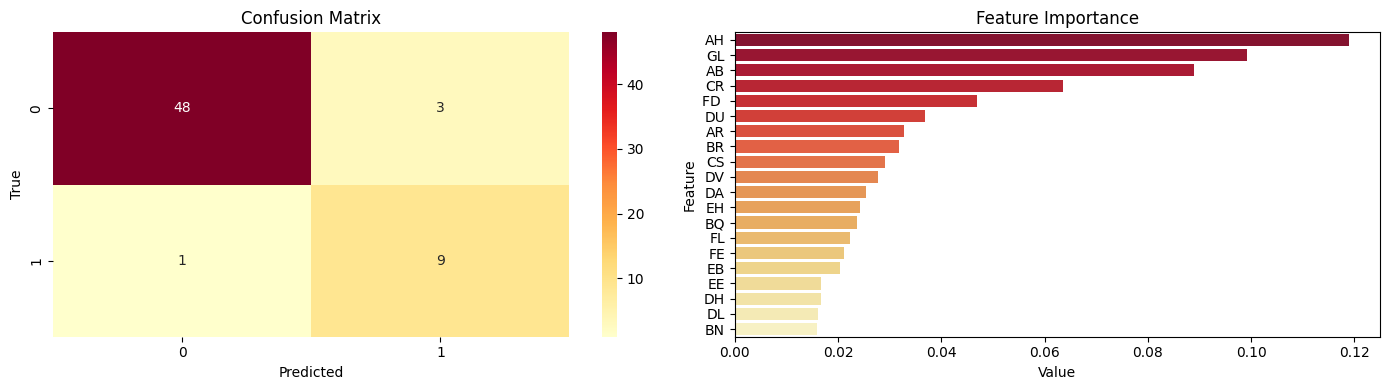

In [38]:
# Confusion Matrix for the last fold
cm = confusion_matrix(y_valid, model.predict(X_valid))

# Feature Importance for the last model
feature_imp = pd.DataFrame({'Value':xgb_models[-1].feature_importances_, 'Feature':X.columns})
feature_imp = feature_imp.sort_values(by="Value", ascending=False)
feature_imp_top20 = feature_imp.iloc[:20]

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# Subplot 1: Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', ax=ax[0], cmap='YlOrRd')
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

# Subplot 2: Feature Importance
sns.barplot(x="Value", y="Feature", data=feature_imp_top20, ax=ax[1], palette='YlOrRd_r')
ax[1].set_title('Feature Importance')

plt.tight_layout()
plt.show()

# Inference(submission)

In [39]:
predictions = model.predict(data_transform(test_df, num_cols, cat_cols, encoder))

PATH_SUB = '/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv'
sub = pd.read_csv(PATH_SUB)
sub['class_1'] = predictions
sub['class_0'] = 1 - predictions
sub.to_csv('submission.csv',index=False)
sub.head(3)

,Id,class_0,class_1
0,00eed32682bb,1,0
1,010ebe33f668,1,0
2,02fa521e1838,1,0
